## REgresión Logística con scikit-learn Introducción (Parte 1)
Vamos a estudiar un problema simple de clasificación.  
Suponer que le preguntamos a 20 estudiantes que están realizando un examen, cuanto tiempo gastaron en prepararse para el examen y se obtuvieron los siguientes  resultados en horas:

In [1]:
# importaciones necesarias
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
plt.style.use("seaborn-v0_8-whitegrid")

In [2]:
hours = np.array([0.5, 0.75, 1., 1.25, 1.5, 1.75, 2.,
                  2.25, 2.5, 2.75, 3., 3.25, 3.5, 3.75, 
                  4., 4.25, 4.5, 4.75, 5., 5.5])

In [3]:
success = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

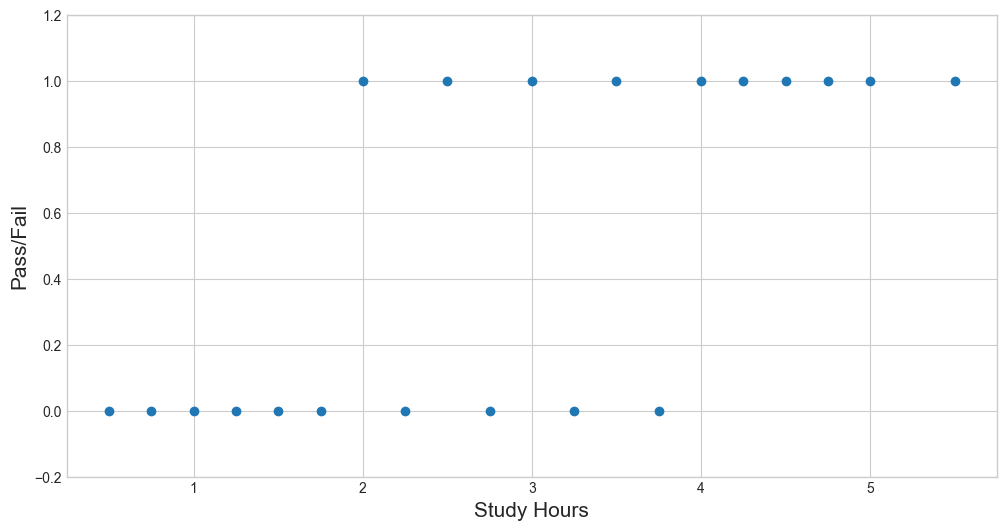

In [4]:
plt.figure(figsize=(12, 6))
plt.scatter(hours, success)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.ylim(-0.2, 1.2)
plt.show()

En la gráfica anterior en el eje X están las horas de estudio y en el eje Y los resultados del examen (Pasó/Falló), donde un uno corresponde a aprobar y un cero a reprobar. Se puede ver, obviamente, que un estudiante que pasa más horas estudiando aprueba con seguridad.  
También se observa una especie de solapaje, es decir, se muestran resultados que con un menor número de horas dedicadas a estudiar también aprueban el examen.  
Para entender mejor este suceso, vamos a crear un dataframe llamado data:

In [5]:
data = pd.DataFrame({"hours": hours, "success": success})

In [6]:
data

,hours,success
0,0.50,0
1,0.75,0
2,1.00,0
3,1.25,0
4,1.50,0
5,1.75,0
6,2.00,1
7,2.25,0
8,2.50,1
9,2.75,0


A modo de prueba, vamos a realizar un ajuste de regresión lineal y analizar un poco los resultados.  
Para ello escogemos las columnas hours y success como variables independiente y dependiente respectivamente:

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression(fit_intercept=True)

In [9]:
lm.fit(data.hours.to_frame(), data.success)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
lm.coef_

array([0.23651361])

In [11]:
lm.intercept_

np.float64(-0.1829330608073586)

In [12]:
data["pred"] = lm.predict(data.hours.to_frame())
data

,hours,success,pred
0,0.50,0,-0.064676
1,0.75,0,-0.005548
2,1.00,0,0.053581
3,1.25,0,0.112709
4,1.50,0,0.171837
5,1.75,0,0.230966
6,2.00,1,0.290094
7,2.25,0,0.349223
8,2.50,1,0.408351
9,2.75,0,0.467479


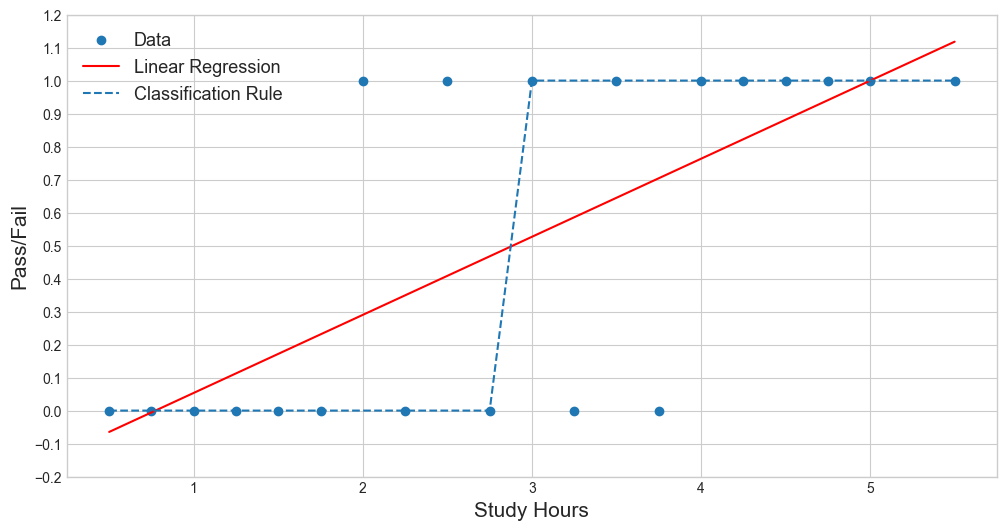

In [14]:
plt.figure(figsize=(12, 6))
plt.scatter(data.hours, data.success, label = "Data")
plt.plot(data.hours, data.pred, color = "red", label = "Linear Regression")

"""En la gráfica se usa la regla de clasificación: si la predicción es mayor a 0.5 se asigna 1 en caso contrario
se asigna 0, esto se implementa en la instrucción que sigue"""
plt.plot(data.hours, np.where(data.pred > 0.5, 1, 0), linestyle = "--", label = "Classification Rule")
plt.legend(fontsize = 13)
plt.yticks(np.arange(-0.2, 1.3, 0.1))
plt.ylim(-0.2, 1.2)
plt.xlabel("Study Hours", fontsize = 15)
plt.ylabel("Pass/Fail", fontsize = 15)
plt.show()


Claramente se puede ver que la predicción falla basada en un modelo de regresión lineal.  
Sin embargo, si se usa una regla de clasificación basada en el modelo de regresión lineal vemos que el modelo clasifica bastante bien, salvo por 5 puntos que quedan sin clasificar.